In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import kagglehub
import os
from matplotlib import pyplot as plt
from pandas import DataFrame

PATH_TO_DATASET = os.path.join(kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube"),
                               "Spotify_Youtube.csv")
DATA_PATH = os.path.join(os.getcwd(), "data")
PLOT_PATH = os.path.join(DATA_PATH, "plots")
CSV_PATH = os.path.join(DATA_PATH, "csv")

# Loading the dataset
#### Initial dataset parsing
The purpose is to remove unwanted columns such as song URL as well as dividing columns into numeric and categorical.


In [34]:
df = pd.read_csv(PATH_TO_DATASET)
NUMERIC_COLUMNS = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
                   'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
CATEGORICAL_COLUMNS = ['Album_type', 'Licensed', 'official_video']
df.drop(columns=['Description', 'Url_youtube', 'Url_spotify', 'Uri', 'Title', 'Channel', 'Artist', 'Album', 'Track', 'Unnamed: 0'],
        axis=1, inplace=True)
df.head()


,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


#### Normalizing Loudness metric to avoid negative values

In [35]:
min_loudness = df['Loudness'].min()
max_loudness = df['Loudness'].max()
df['Loudness'] = (df['Loudness'] - min_loudness) / (max_loudness - min_loudness)
df.head()

,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,album,0.818,0.705,6.0,0.838905,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,album,0.676,0.703,8.0,0.857222,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,single,0.695,0.923,1.0,0.897183,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,album,0.689,0.739,2.0,0.857328,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,album,0.663,0.694,10.0,0.797609,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


#### Encoding non-boolean categorical variables
Album_type category has three distinct values: Album, Compilation and Single.

In [36]:
df['Album_type'] = pd.factorize(df['Album_type'])[0]
df.head()

,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,0,0.818,0.705,6.0,0.838905,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,0,0.676,0.703,8.0,0.857222,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,1,0.695,0.923,1.0,0.897183,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,0,0.689,0.739,2.0,0.857328,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,0,0.663,0.694,10.0,0.797609,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


# Reading basic data

#### Numerical values

In [6]:

numeric_missing_value = df[NUMERIC_COLUMNS].isna().sum()
print(f"Count of missing numeric values:\n{numeric_missing_value}\n")
df.dropna(subset=NUMERIC_COLUMNS, inplace=True)
numeric_summary = df[NUMERIC_COLUMNS].describe(percentiles=[0.05, 0.5, 0.95])
display(numeric_summary)

Count of missing numeric values:
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Views               470
Likes               541
Comments            569
Stream              576
dtype: int64



,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04
mean,0.621059,0.635170,5.294337,0.818677,0.095392,0.289106,0.055292,0.191226,0.528950,120.605702,2.246281e+05,9.545626e+07,6.700487e+05,2.786371e+04,1.371101e+08
std,0.165489,0.213555,3.579338,0.097917,0.106243,0.285908,0.192519,0.165197,0.245228,29.619340,1.269126e+05,2.775744e+08,1.805054e+06,1.959074e+05,2.463589e+08
min,0.000000,0.000020,0.000000,0.000000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
5%,0.319000,0.220000,0.000000,0.648212,0.027800,0.001614,0.000000,0.058400,0.119000,78.435600,1.342670e+05,5.476040e+04,8.340000e+02,1.100000e+01,2.651398e+06
50%,0.639000,0.666000,5.000000,0.842361,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132530e+05,1.491440e+07,1.279090e+05,3.343000e+03,4.979139e+07
95%,0.862000,0.929000,11.000000,0.912747,0.319600,0.885600,0.575400,0.551000,0.920000,174.799600,3.342132e+05,4.398550e+08,3.041081e+06,1.020016e+05,5.844489e+08
max,0.975000,1.000000,11.000000,1.000000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


#### Categorical values


In [7]:
categorical_missing_value = df[CATEGORICAL_COLUMNS].isna().sum()
print(f"Count of missing categorical values:\n{categorical_missing_value}\n")
df.dropna(subset=CATEGORICAL_COLUMNS, inplace=True)
categorical_summary = df[CATEGORICAL_COLUMNS].describe()
display(categorical_summary)
categorical_proportions = [
    df['Album_type'].value_counts(normalize=True),
    df['Licensed'].value_counts(normalize=True),
    df['official_video'].value_counts(normalize=True)
]
display(categorical_proportions)

Count of missing categorical values:
Album_type        0
Licensed          0
official_video    0
dtype: int64



,Album_type
count,19549.000000
mean,0.312701
std,0.536448
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


[Album_type
 0    0.723720
 1    0.239859
 2    0.036421
 Name: proportion, dtype: float64,
 Licensed
 True     0.702184
 False    0.297816
 Name: proportion, dtype: float64,
 official_video
 True     0.780603
 False    0.219397
 Name: proportion, dtype: float64]

#### [Optional] Save the data to .csv files.

In [8]:
def save_to_csv(to_save, filename):
    full_filename = f'{filename}.csv'
    if not isinstance(to_save, list):
        to_save.to_csv(os.path.join(CSV_PATH, full_filename), index=True)
    else:
        to_save[0].to_csv(os.path.join(CSV_PATH, full_filename), index=True)
        for df_to_save in to_save[1:]:
            df_to_save.to_csv(os.path.join(CSV_PATH, full_filename), mode='a', index=True)
    print(f"Saved file {full_filename}")


save_to_csv(numeric_summary, "numeric_summary")
save_to_csv(numeric_missing_value, "numeric_missing_value")
save_to_csv(categorical_summary, "categorical_summary")
save_to_csv(categorical_missing_value, "categorical_missing_value")
save_to_csv(categorical_proportions, "categorical_proportions")
print(f"Data saved to {CSV_PATH}")

Saved file numeric_summary.csv
Saved file numeric_missing_value.csv
Saved file categorical_summary.csv
Saved file categorical_missing_value.csv
Saved file categorical_proportions.csv
Data saved to C:\Users\Ignac\OneDrive\Pulpit\Studia\S4\MSID\SpotifySongs\data\csv


In [9]:
# Visualizing the data

In [10]:
def save_plot(plot, filename):
    full_filename = f'{filename}.png'
    plot.savefig(os.path.join(PLOT_PATH, full_filename), bbox_inches='tight')
    print(f"Saved plot {full_filename}")

# Removing the outliers
Due to extremely large differences in values for numeric columns such as 'Stream', 'Views' or 'Likes', with some differences reaching even six magnitudes as we compare both global hits and niche songs by fledgling singers, it is crucial to eliminate the outliers before proceeding further.
Sample boxplot without having removed the outliers below:

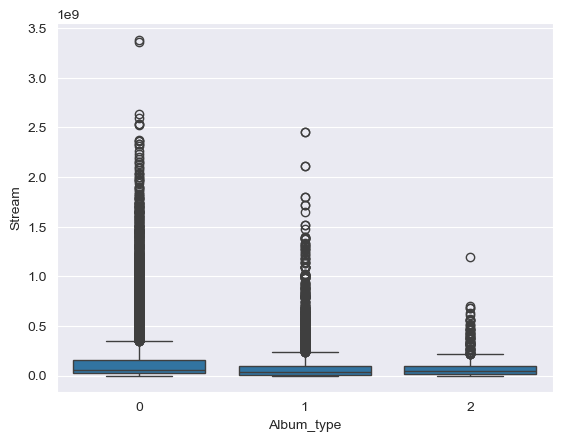

In [11]:
sns.boxplot(data=df, x="Album_type", y="Stream")
plt.show()
plt.close()

As such, using the IQR method to remove outliers for numeric columns and to drop those with more than 20% outliers (too unpredictable data):

In [37]:
for column in NUMERIC_COLUMNS:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = df[column][(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)].count()
    print(f"Outlier count: {outlier_count} for column {column}. {outlier_count / len(df) * 100:.2f}% of the dataset")
    if outlier_count > 0:
        if outlier_count > len(df) / 5:
            print(f"Dropping column {column} as outlier count is too high")
            NUMERIC_COLUMNS.remove(column)
            df.drop(columns=column, inplace=True)
        else:
            df[column] = df[column].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
print(f"Numeric columns after removing outliers: {NUMERIC_COLUMNS}")

Outlier count: 265 for column Danceability. 1.28% of the dataset
Outlier count: 364 for column Energy. 1.76% of the dataset
Outlier count: 0 for column Key. 0.00% of the dataset
Outlier count: 1294 for column Loudness. 6.25% of the dataset
Outlier count: 2646 for column Speechiness. 12.77% of the dataset
Outlier count: 0 for column Acousticness. 0.00% of the dataset
Outlier count: 4439 for column Instrumentalness. 21.43% of the dataset
Dropping column Instrumentalness as outlier count is too high
Outlier count: 0 for column Valence. 0.00% of the dataset
Outlier count: 64 for column Tempo. 0.31% of the dataset
Outlier count: 793 for column Duration_ms. 3.83% of the dataset
Outlier count: 2604 for column Views. 12.57% of the dataset
Outlier count: 2561 for column Likes. 12.36% of the dataset
Outlier count: 2600 for column Comments. 12.55% of the dataset
Outlier count: 2230 for column Stream. 10.76% of the dataset
Numeric columns after removing outliers: ['Danceability', 'Energy', 'Key', 

## 1. Boxplots and Violin plots

#### Relationship between song's performance (number of Views (YouTube) and Streams (Spotify)) and the presence of an official video for the song

- **Streams**

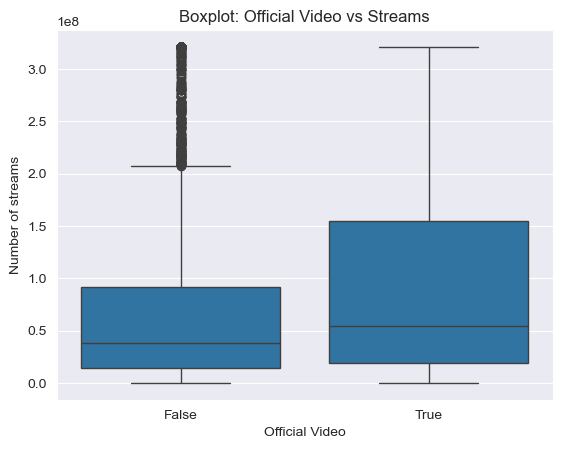

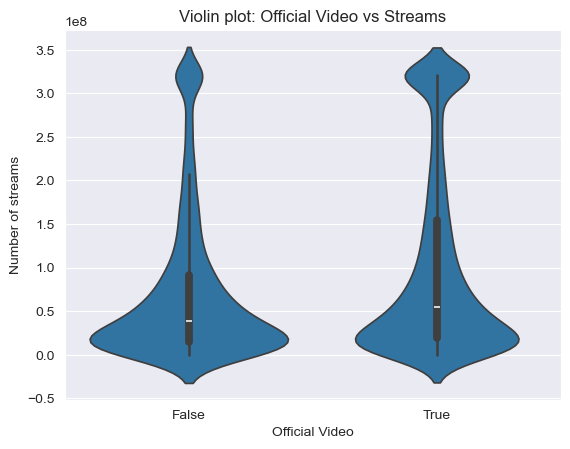

In [13]:
sns.boxplot(x="official_video", y="Stream", data=df)
plt.title("Boxplot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
plt.show()
plt.close()
sns.violinplot(x="official_video", y="Stream", data=df)
plt.title("Violin plot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
plt.show()
plt.close()

- **Views**

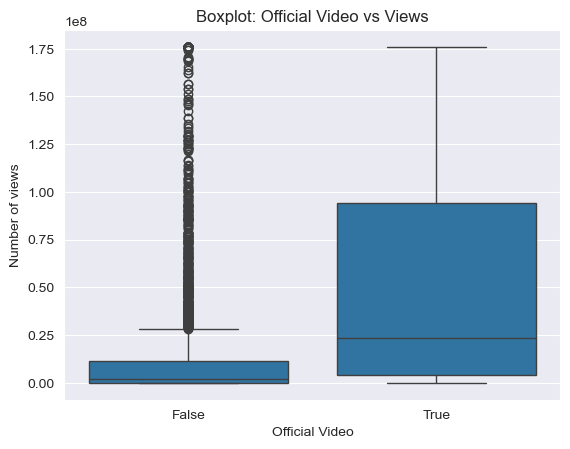

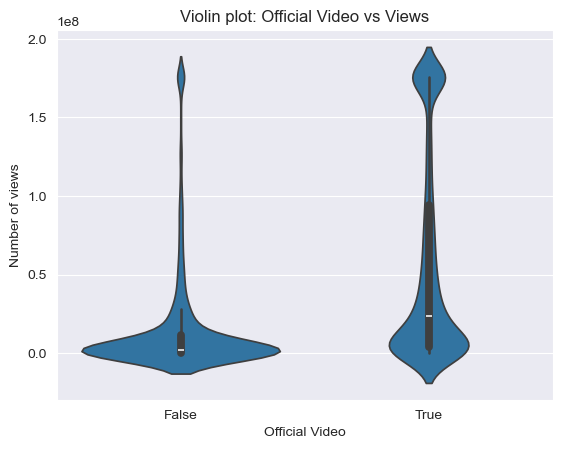

In [14]:
sns.boxplot(x="official_video", y="Views", data=df)
plt.title("Boxplot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
plt.show()
plt.close()
sns.violinplot(x="official_video", y="Views", data=df)
plt.title("Violin plot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
plt.show()
plt.close()

#### Relationship between the upload format of a song (as a single, album or part of a compilation) and the number of streams on Spotify

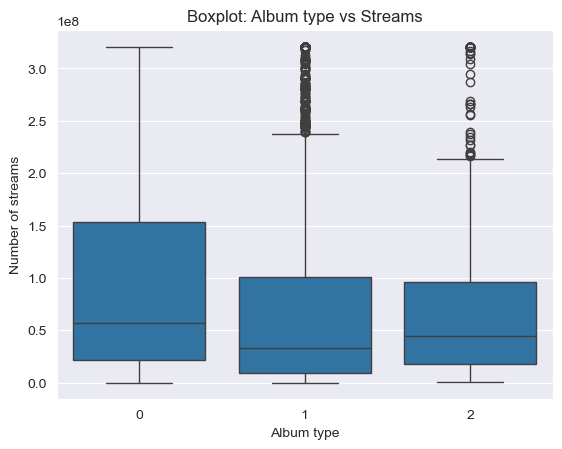

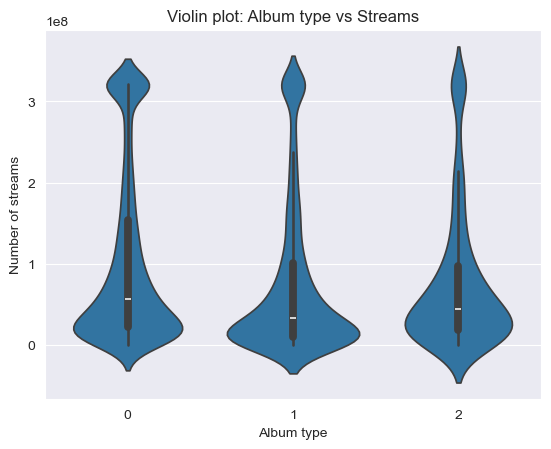

In [15]:
sns.boxplot(x="Album_type", y="Stream", data=df)
plt.title("Boxplot: Album type vs Streams")
plt.xlabel("Album type")
plt.ylabel("Number of streams")
plt.show()
plt.close()
sns.violinplot(x="Album_type", y="Stream", data=df)
plt.title("Violin plot: Album type vs Streams")
plt.xlabel("Album type")
plt.ylabel("Number of streams")
plt.show()
plt.close()

##### [Optional] Save boxplots and violinplots to a file

In [16]:
sns.boxplot(x="official_video", y="Views", data=df)
plt.title("Boxplot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
save_plot(plt, "boxplot_official_video_vs_views")
plt.close()
sns.violinplot(x="official_video", y="Views", data=df)
plt.title("Violin plot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
save_plot(plt, "violinplot_official_video_vs_views")
plt.close()
sns.boxplot(x="official_video", y="Stream", data=df)
plt.title("Boxplot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
save_plot(plt, "boxplot_official_video_vs_stream")
plt.close()
sns.violinplot(x="official_video", y="Stream", data=df)
plt.title("Violin plot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
save_plot(plt, "violinplot_official_video_vs_stream")
plt.close()
sns.boxplot(x="Album_type", y="Stream", data=df)
plt.title("Boxplot: Album Type vs Streams")
plt.xlabel("Album Type")
plt.ylabel("Number of streams")
save_plot(plt, "boxplot_album_type_vs_stream")
plt.close()
sns.violinplot(x="Album_type", y="Stream", data=df)
plt.title("Violin plot: Album Type vs Streams")
plt.xlabel("Album Type")
plt.ylabel("Number of streams")
save_plot(plt, "violinplot_album_type_vs_stream")
plt.close()

Saved plot boxplot_official_video_vs_views.png
Saved plot violinplot_official_video_vs_views.png
Saved plot boxplot_official_video_vs_stream.png
Saved plot violinplot_official_video_vs_stream.png
Saved plot boxplot_album_type_vs_stream.png
Saved plot violinplot_album_type_vs_stream.png


# 2. Error bar visualization
Due to large spread of data in terms of important numeric values, such as the number of streams or likes, percentile intervals will be used for them instead of standard deviation or standard error to plot the error bars.
Comparison between performance of songs with an official video on Spotify (streams) and YouTube with 90% interval.

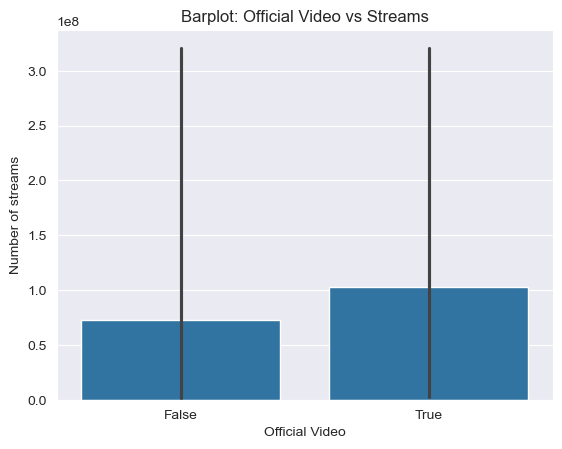

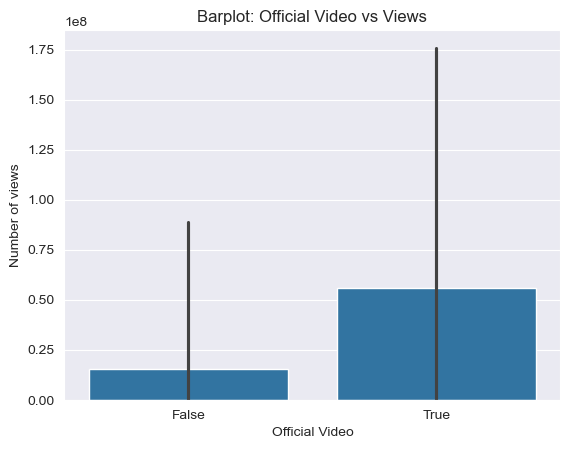

In [17]:
sns.barplot(x="official_video", y="Stream", data=df, errorbar=("pi", 90))
plt.title("Barplot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
plt.show()
plt.close()
sns.barplot(x="official_video", y="Views", data=df, errorbar=("pi", 90))
plt.title("Barplot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
plt.show()
plt.close()

# 3. Histograms for numeric data

#### Distribution of views and streams

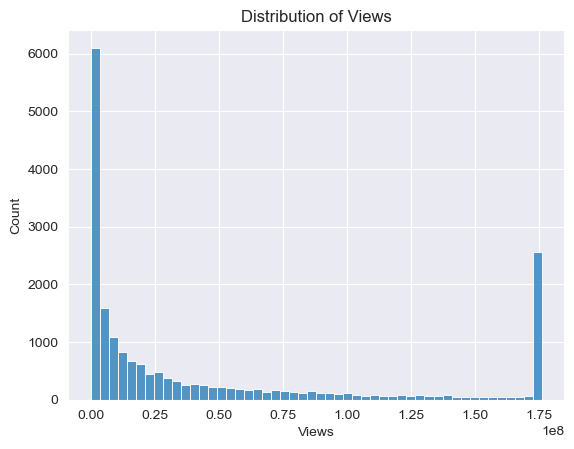

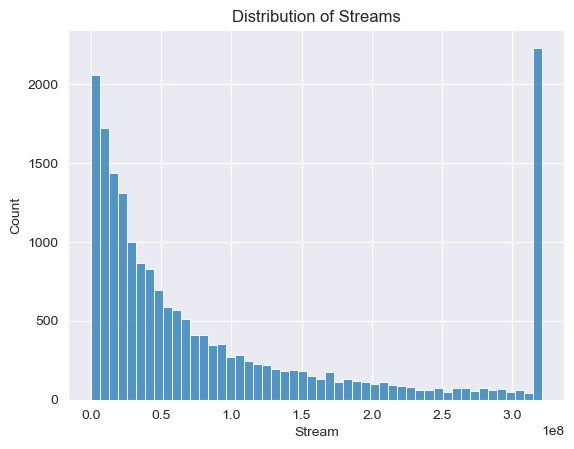

In [18]:
sns.histplot(data=df, x="Views", bins=50)
plt.title("Distribution of Views")
plt.show()
plt.close()
sns.histplot(data=df, x="Stream", bins=50)
plt.title("Distribution of Streams")
plt.show()
plt.close()

#### Distribution of song metrics

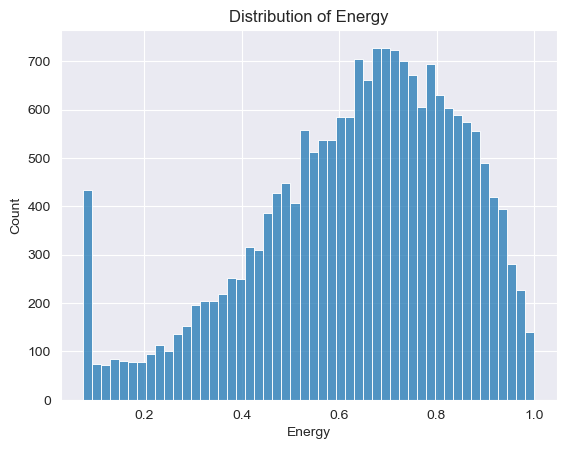

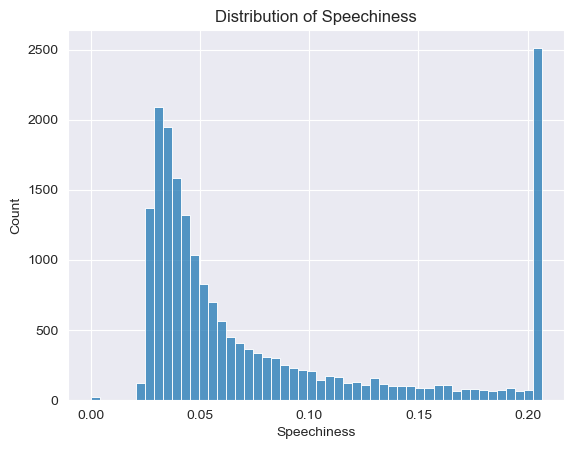

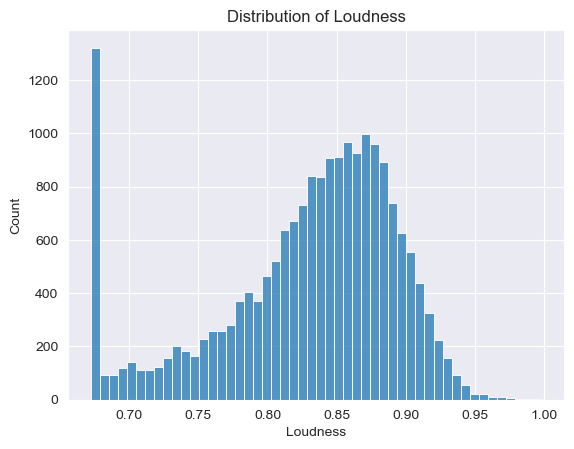

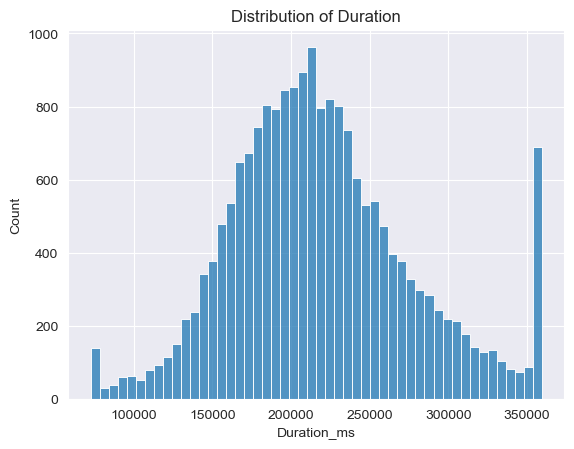

In [19]:
sns.histplot(data=df, x="Energy", bins=50)
plt.title("Distribution of Energy")
plt.show()
plt.close()
sns.histplot(data=df, x="Speechiness", bins=50)
plt.title("Distribution of Speechiness")
plt.show()
plt.close()
sns.histplot(data=df, x="Loudness", bins=50)
plt.title("Distribution of Loudness")
plt.show()
plt.close()
sns.histplot(data=df, x="Duration_ms", bins=50)
plt.title("Distribution of Duration")
plt.show()
plt.close()

## Adding hue parameter to the histograms
Distribution of streams with hue assigned to Album type category and a normalized version of it.

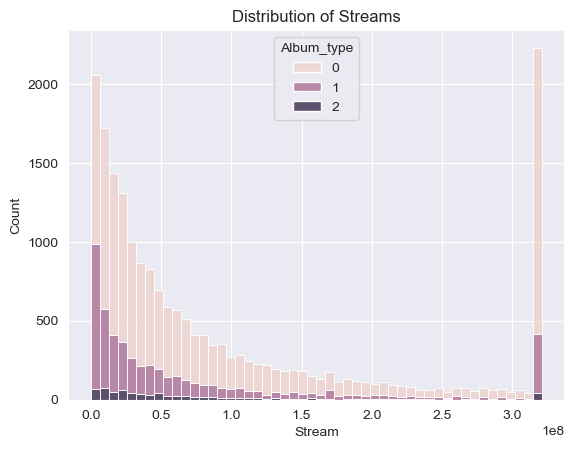

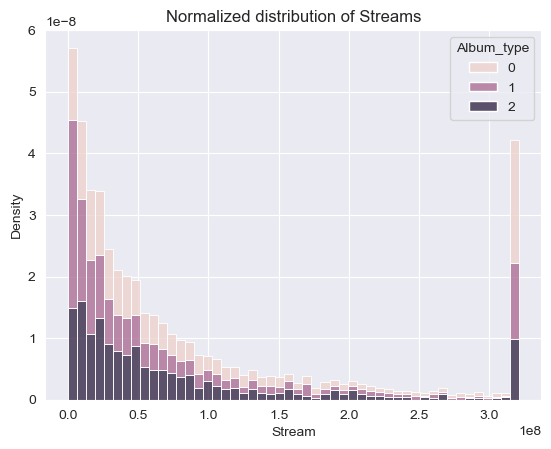

In [20]:
sns.histplot(data=df, x="Stream", hue="Album_type", bins=50, multiple="stack")
plt.title("Distribution of Streams")
plt.show()
plt.close()
sns.histplot(data=df, x="Stream", hue="Album_type", bins=50, multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Streams")
plt.show()
plt.close()

It is worth noting that in terms of YouTube performance, the type of album seems to be of no particular relation with the number of views, with each density being roughly equal in any of the buckets.

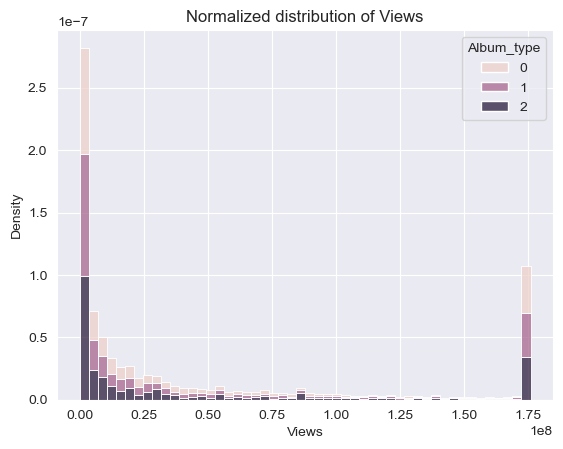

In [21]:
sns.histplot(data=df, x="Views", hue="Album_type", bins=50, multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Views")
plt.show()
plt.close()

##### Song key distribution

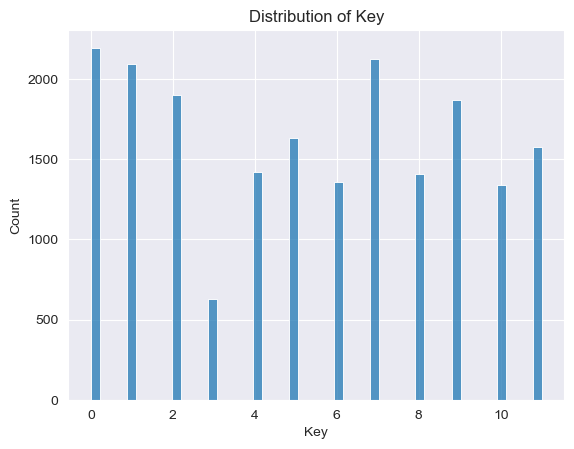

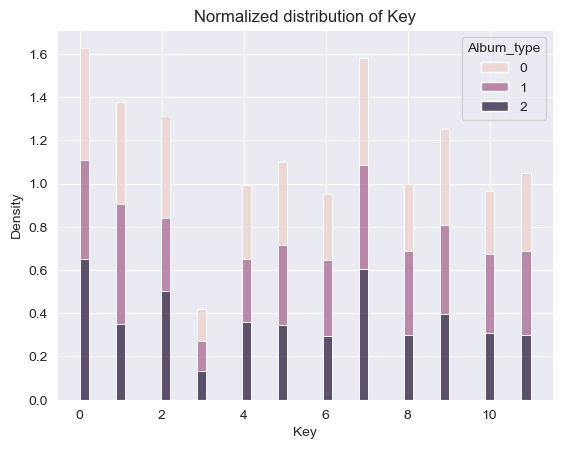

In [22]:
sns.histplot(data=df, x="Key", bins=50)
plt.title("Distribution of Key")
plt.show()
plt.close()
sns.histplot(data=df, x="Key", bins=50, hue="Album_type", multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Key")
plt.show()
plt.close()

##### [Optional] Save distributions to a file

In [23]:
sns.histplot(data=df, x="Views", bins=50)
plt.title("Distribution of Views")
save_plot(plt, "histplot_views")
plt.close()
sns.histplot(data=df, x="Stream", bins=50)
plt.title("Distribution of Streams")
save_plot(plt, "histplot_streams")
plt.close()
sns.histplot(data=df, x="Energy", bins=50)
plt.title("Distribution of Energy")
save_plot(plt, "histplot_energy")
plt.close()
sns.histplot(data=df, x="Speechiness", bins=50)
plt.title("Distribution of Speechiness")
save_plot(plt, "histplot_speechiness")
plt.close()
sns.histplot(data=df, x="Loudness", bins=50)
plt.title("Distribution of Loudness")
save_plot(plt, "histplot_loudness")
plt.close()
sns.histplot(data=df, x="Duration_ms", bins=50)
plt.title("Distribution of Duration")
save_plot(plt, "histplot_duration")
plt.close()
sns.histplot(data=df, x="Stream", hue="Album_type", bins=50, multiple="stack")
plt.title("Distribution of Streams")
save_plot(plt, "histplot_streams_hue")
plt.close()
sns.histplot(data=df, x="Stream", hue="Album_type", bins=50, multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Streams")
save_plot(plt, "histplot_streams_hue_normalized")
plt.close()
sns.histplot(data=df, x="Views", hue="Album_type", bins=50, multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Views")
save_plot(plt, "histplot_views_hue_normalized")
plt.close()
sns.histplot(data=df, x="Key", bins=50)
plt.title("Distribution of Key")
save_plot(plt, "histplot_key")
plt.close()
sns.histplot(data=df, x="Key", bins=50, hue="Album_type", multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Key")
save_plot(plt, "histplot_key_hue")
plt.close()

Saved plot histplot_views.png
Saved plot histplot_streams.png
Saved plot histplot_energy.png
Saved plot histplot_speechiness.png
Saved plot histplot_loudness.png
Saved plot histplot_duration.png
Saved plot histplot_streams_hue.png
Saved plot histplot_streams_hue_normalized.png
Saved plot histplot_views_hue_normalized.png
Saved plot histplot_key.png
Saved plot histplot_key_hue.png


# 4. Data correlation heatmap

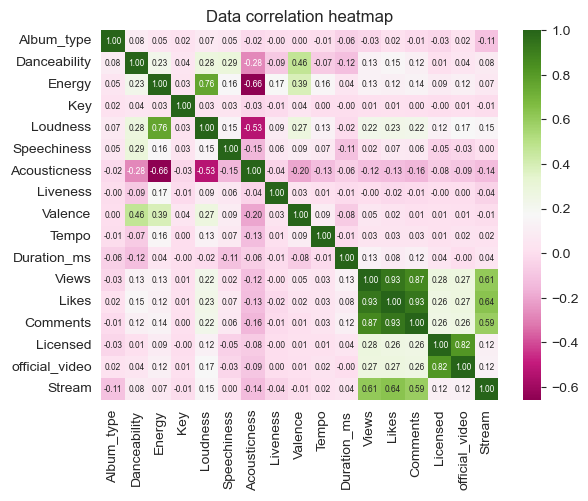

<Figure size 1000x1000 with 0 Axes>

In [40]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="PiYG", annot_kws={"size": 6})
plt.title("Data correlation heatmap")
plt.figure(figsize=(10, 10))
plt.show()

#### [Optional] Save heatmap to a file


In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="PiYG", annot_kws={"size": 6})
plt.title("Data correlation heatmap")
plt.figure(figsize=(10, 10))
save_plot(plt, "correlation_heatmap")